#### Name: Gnanaprakash R
#### sch.No.: 212115109

This notebook is created in Google Colab

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Face Datasets/combined Dataset.zip", 'r')
zip_ref.extractall("/content/drive/My Drive/Face Datasets")
zip_ref.close()

Mounted at /content/drive/


In [ ]:
import cv2
import math
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
Train_dir = pathlib.Path('/content/drive/MyDrive/Face Datasets/combined Dataset/train')
Test_dir = pathlib.Path('/content/drive/MyDrive/Face Datasets/combined Dataset/test')
Val_dir = pathlib.Path('/content/drive/MyDrive/Face Datasets/combined Dataset/val')

In [ ]:
image_count_train = len(list(Train_dir.glob('*/*.jpg'))) + len(list(Train_dir.glob('*/*.png'))) + len(list(Train_dir.glob('*/*.jpeg')))
print("Training Samples ---> ",image_count_train)

image_count_test = len(list(Test_dir.glob('*/*.jpg'))) + len(list(Test_dir.glob('*/*.jpeg'))) + len(list(Test_dir.glob('*/*.png')))
print("Testing Samples ---> ",image_count_test)

image_count_val = len(list(Val_dir.glob('*/*.jpg'))) + len(list(Val_dir.glob('*/*.jepg'))) + len(list(Val_dir.glob('*/*.png')))
print("validation Samples ---> ",image_count_val)

Training Samples --->  5368
Testing Samples --->  4306
validation Samples --->  4996


In [ ]:
#Defining constants

random_seed=123
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Training Set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(Train_dir,
                                                               seed=random_seed,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)
# Testing Set
test_ds = tf.keras.preprocessing.image_dataset_from_directory(Test_dir,
                                                               seed=random_seed,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

# Validation Set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(Val_dir,
                                                               seed=random_seed,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 5376 files belonging to 65 classes.
Found 4312 files belonging to 65 classes.
Found 5158 files belonging to 65 classes.


In [ ]:
# Listing all the classes

class_names = train_ds.class_names
class_map={}
name_class_map={
    "Aamir_Khan":"Aamir_khan", "Abhishek_Bachchan":"Abhishek_Bachchan",
    "Aishwarya_Rai":"Aishwarya_Rai", "Akshay_Kumar":"Akshay_Kumar",
    "Alia_Bhatt":"Alia_Bhatt", "Amitabh_Bachchan":"Amitabh_Bachchan",
    "Amy_Jackson":"Amy_Jackson", "Angelina_Jolie":"Angelina_Jolie",
    "Anushka_Sharma":"Anushka_Sharma", "Arnold_Schwarzenegger":"Arnold_Schwarzenegger",
    "Asin":"Asin", "Atal_Bihari_Vajpayee":"Atal_Bihari_Vajpayee",
    "Bill_Clinton":"Bill_Clinton", "Bill_Gates":"Bill_Gates",
    "Brad":"Brad", "Chris_evans":"Chris_evans", "Chris_hemsworth":"Chris_hemsworth",
    "Daniel":"Daniel Jacob", "Deepika_Padukone":"Deepika_Padukone",
    "Disha_Patani":"Disha_Patani", "Elon":"Elon", "Ema":"Ema","Emilia":"Emilia",
    "Esha_Gupta":"Esha_Gupta", "George_HW_Bush":"George_HW_Bush",
    "George_W_Bush":"George_W_Bush", "Halle_Berry":"Halle_Berry",
    "Harrison_Ford":"Harrison_Ford", "Hillary_Clinton":"Hillary_Clinton",
    "Hrithik_Roshan":"Hrithik_Roshan", "Ileana_DCruz":"Ileana_DCruz",
    "Jackie_Chan":"Jackie_Chan", "Jacqueline_Fernandez":"Jacqueline_Fernandez",
    "Jennifer_Lopez":"Jennifer_Lopez", "Kajal_Aggarwal":"Kajal_Aggarwal",
    "Kareena_Kapoor":"Kareena_Kapoor", "Katrina_Kaif":"Katrina_Kaif",
    "Kiara_Advani":"Kiara_Advani", "Madonna":"Madonna", "Maisie":"Maisie",
    "Mark_ruffalo":"Mark_ruffalo", "Michael_Bloomberg":"Michael_Bloomberg",
    "Michael_Jackson":"Michael_Jackson", "Muhammad_Ali":"Muhammad_Ali",
    "Obama":"Barack_obama", "Pooja_Hegde":"Pooja_Hegde","Prabhas":"Prabhas",
    "Queen_Elizabeth_II":"Queen_Elizabeth_II", "R_Madhavan":"R_Madhavan",
    "Ranveer_Singh":"Ranveer_Singh", "Robert_downey_jr":"Robert_downey_jr",
    "Salman_Khan":"Salman_Khan", "Scarlett_johansson":"Scarlett_johansson",
    "Serena_Williams":"Serena_Williams", "Shah_Rukh_Khan":"Shah_Rukh_Khan",
    "Shraddha_Kapoor":"Shraddha_Kapoor", "Sonam_Kapoor":"Sonam_Kapoor",
    "Sushant_Singh_Rajput":"Sushant_Singh_Rajput", "Taapsee_Pannu":"Taapsee_Pannu",
    "Tamannaah_Bhatia":"Tamannaah_Bhatia", "Tiger_Shroff":"Tiger_Shroff",
    "Tom_Cruise":"Tom_Cruise", "Trump":"Trump", "Vladimir_Putin":"Vladimir_Putin",
    "Zuckerberg":"Zuckerberg"
}



In [ ]:
for i in range(len(class_names)):
    class_map[i]=class_names[i]
class_map

{0: 'Aamir_Khan',
 1: 'Abhishek_Bachchan',
 2: 'Aishwarya_Rai',
 3: 'Akshay_Kumar',
 4: 'Alia_Bhatt',
 5: 'Amitabh_Bachchan',
 6: 'Amy_Jackson',
 7: 'Angelina_Jolie',
 8: 'Anushka_Sharma',
 9: 'Arnold_Schwarzenegger',
 10: 'Asin',
 11: 'Atal_Bihari_Vajpayee',
 12: 'Bill_Clinton',
 13: 'Bill_Gates',
 14: 'Brad',
 15: 'Chris_evans',
 16: 'Chris_hemsworth',
 17: 'Daniel',
 18: 'Deepika_Padukone',
 19: 'Disha_Patani',
 20: 'Elon',
 21: 'Ema',
 22: 'Emilia',
 23: 'Esha_Gupta',
 24: 'George_HW_Bush',
 25: 'George_W_Bush',
 26: 'Halle_Berry',
 27: 'Harrison_Ford',
 28: 'Hillary_Clinton',
 29: 'Hrithik_Roshan',
 30: 'Ileana_DCruz',
 31: 'Jackie_Chan',
 32: 'Jacqueline_Fernandez',
 33: 'Jennifer_Lopez',
 34: 'Kajal_Aggarwal',
 35: 'Kareena_Kapoor',
 36: 'Katrina_Kaif',
 37: 'Kiara_Advani',
 38: 'Madonna',
 39: 'Maisie',
 40: 'Mark_ruffalo',
 41: 'Michael_Bloomberg',
 42: 'Michael_Jackson',
 43: 'Muhammad_Ali',
 44: 'Obama',
 45: 'Pooja_Hegde',
 46: 'Prabhas',
 47: 'Queen_Elizabeth_II',
 48: 'R_

In [ ]:
#Visualizing Data Classes Distribution

class_count = []
for i in range(len(class_names)):
    # class_count.append(len(list(Train_dir.glob('{}/*.jpg'.format(class_names[i])))))
    x = len(list(Train_dir.glob('{}/*.jpg'.format(class_names[i]))))
    y = len(list(Train_dir.glob('{}/*.jpeg'.format(class_names[i]))))
    z = len(list(Train_dir.glob('{}/*.png'.format(class_names[i]))))
    class_count.append(x+y+z)

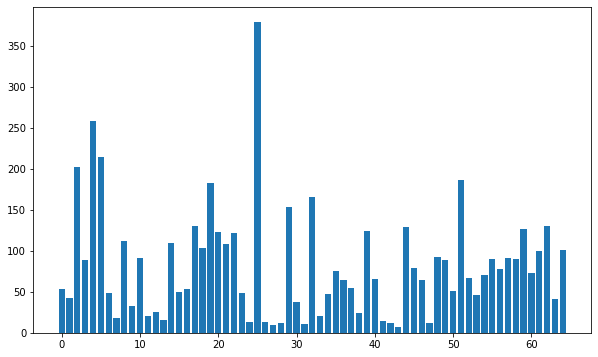

In [ ]:
plt.bar(class_map.keys(), height = class_count)
plt.show()

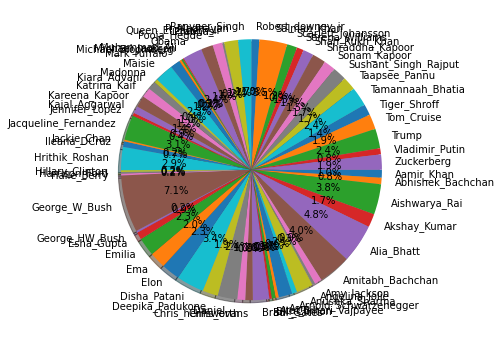

In [ ]:
plt.pie(class_count, shadow=True, startangle=0, explode=np.zeros(65), autopct='%1.1f%%', counterclock=False, labels=train_ds.class_names)
#, labels=class_map.values())
plt.show()

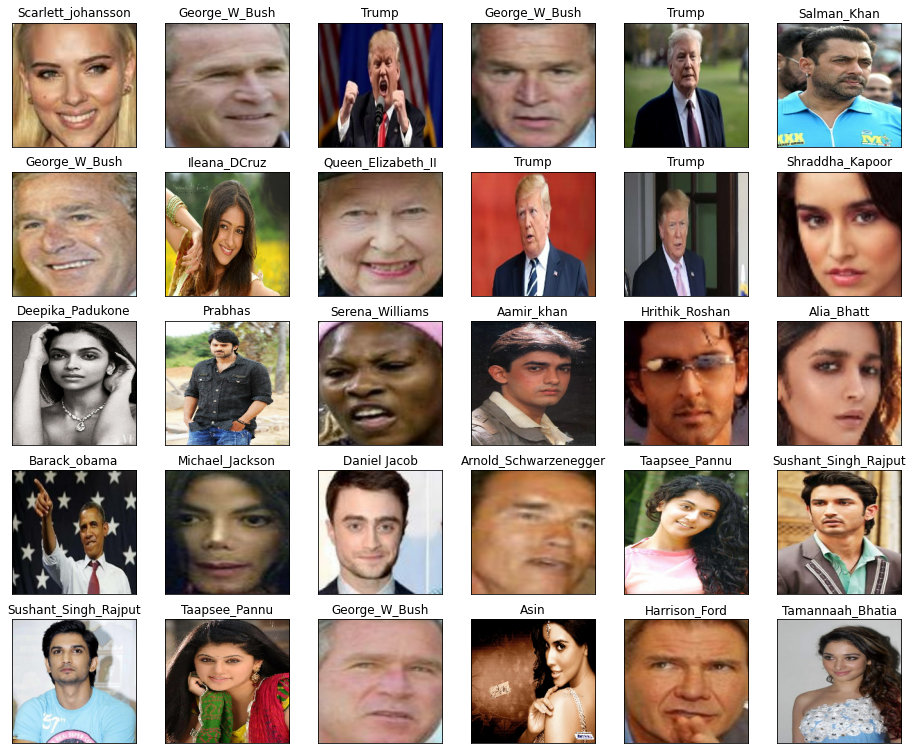

In [ ]:
#Visualising a batch of image dataset

plt.figure(figsize=[16,16])
for image, label in train_ds.take(1):
    for e,i in enumerate(image):
        if e<30:
            plt.subplot(6,6,e+1)
            plt.imshow(i.numpy().astype('uint8'))
            plt.title(name_class_map[class_map[label[e].numpy()]])
            plt.xticks([])
            plt.yticks([])
plt.show()

In [ ]:
# Staging the Dataset

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Develop a sequential model using tensorflow keras

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(img_height, img_width,3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu" ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu" ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.BatchNormalization(),  
    # tf.keras.layers.Dropout(0.5),      
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu" ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.5),   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(65, activation='softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
# Training the model

chkpt = ModelCheckpoint('checkpoints/best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=0.01)

epochs=15
history_1 = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[es, chkpt])

Epoch 1/15
168/168 [==============================] - ETA: 0s - loss: 3.5915 - accuracy: 0.1112
Epoch 1: val_loss improved from inf to 3.24704, saving model to checkpoints/best_model.h5
168/168 [==============================] - 987s 4s/step - loss: 3.5915 - accuracy: 0.1112 - val_loss: 3.2470 - val_accuracy: 0.1435
Epoch 2/15
168/168 [==============================] - ETA: 0s - loss: 2.9661 - accuracy: 0.2052
Epoch 2: val_loss improved from 3.24704 to 2.68869, saving model to checkpoints/best_model.h5
168/168 [==============================] - 296s 2s/step - loss: 2.9661 - accuracy: 0.2052 - val_loss: 2.6887 - val_accuracy: 0.2606
Epoch 3/15
168/168 [==============================] - ETA: 0s - loss: 2.4924 - accuracy: 0.3062
Epoch 3: val_loss improved from 2.68869 to 2.21744, saving model to checkpoints/best_model.h5
168/168 [==============================] - 290s 2s/step - loss: 2.4924 - accuracy: 0.3062 - val_loss: 2.2174 - val_accuracy: 0.3637
Epoch 4/15
168/168 [==================

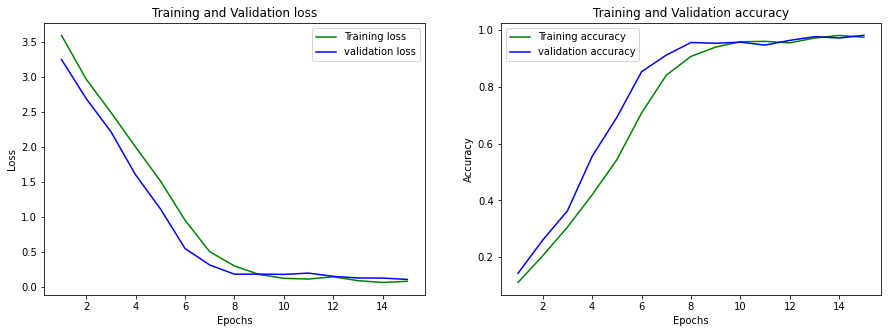

In [ ]:
#Visualising model performance

acc_train = history_1.history['accuracy']
acc_val = history_1.history['val_accuracy']

loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']

epochs = range(1,len(loss_train)+1)
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Loading the saved model from checkpoint

saved_model = tf.keras.models.load_model('checkpoints/best_model.h5')
saved_model

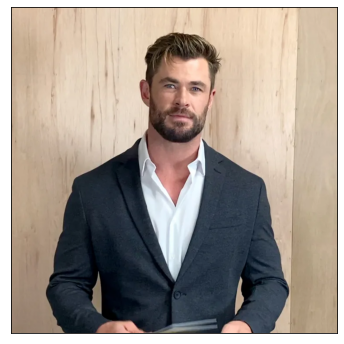

In [ ]:
# Reading a sample image file
import urllib

# urllib.request.urlretrieve("https://www.pinkvilla.com/files/styles/amp_metadata_content_image/public/amitabh_bachchan_abhishek_bachchan__1.jpg", "urlimage.jpg")
# urllib.request.urlretrieve("https://nientepopcorn.b-cdn.net/persone-img/big/robert-downey-jr-3223.jpg", "urlimage.jpg")
# urllib.request.urlretrieve("https://static.onecms.io/wp-content/uploads/sites/20/2020/12/01/12-14-2020-tout.jpg", "urlimage.jpg")
# urllib.request.urlretrieve("https://upload.wikimedia.org/wikipedia/commons/2/26/Scarlett_Johansson_by_Gage_Skidmore_2019.jpg", "urlimage.jpg")
urllib.request.urlretrieve("https://www.pinkvilla.com/imageresize/chris_future_thor.jpg?width=752&format=webp&t=pvorg", "urlimage.jpg")

urllib.request.urlretrieve("https://raw.githubusercontent.com/Masterx-AI/Project_Face_Recognition/main/face.xml", "face.xml")

img = cv2.imread('urlimage.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plotting the image
def plot_image(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    
plot_image(img)
plt.show()

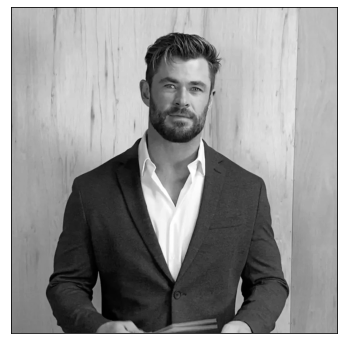

In [ ]:
# Converting the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plot_image(gray, cmap='gray')
plt.show()

In [ ]:
# Implementing Cascade Classifier

face_cascade = cv2.CascadeClassifier('face.xml')

faces_rect = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10)

print(f'Number of face ===> {len(faces_rect)}')

Number of face ===> 1


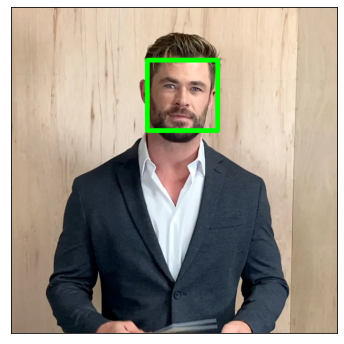

In [ ]:

img_2 = img.copy()

for (x,y,w,h) in faces_rect:
    cropped = img[y:y+h, x:x+w].copy()
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), thickness=10)
    
    # img_2 = img.copy()
    cropped = cv2.resize(cropped, (img_height, img_width))
    final_img = np.expand_dims(cropped, axis=0)

plot_image(img)

    

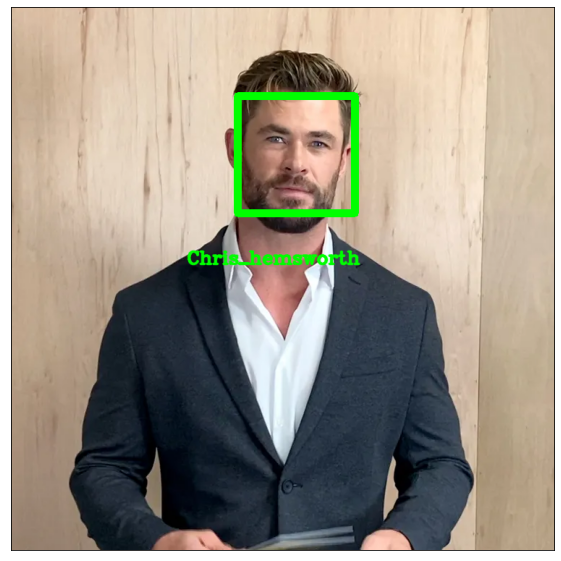

In [ ]:

img_2 = img.copy()
plt.figure(figsize=[10,10])
for (x,y,w,h) in faces_rect:
    cropped = img[y:y+h, x:x+w].copy()
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), thickness=10)
    
    # img_2 = img.copy()
    cropped = cv2.resize(cropped, (img_height, img_width))
    final_img = np.expand_dims(cropped, axis=0)

    #Prediction                   
    prediction = saved_model.predict(final_img)
    predicted_value = np.argmax(prediction)
    predicted_label = name_class_map[class_map[predicted_value]]

    cv2.putText(img_2, predicted_label, (x-70,y+h+70), cv2.FONT_HERSHEY_COMPLEX, w/200, (0,255,0), 2, cv2.LINE_AA)

plot_image(img_2)

    

### This model can performs:
#### - counts Number of faces in the given image
#### - can detect multiple faces in the given image
#### - can label (if the faces are in the 65 celebrity faces) in the given image

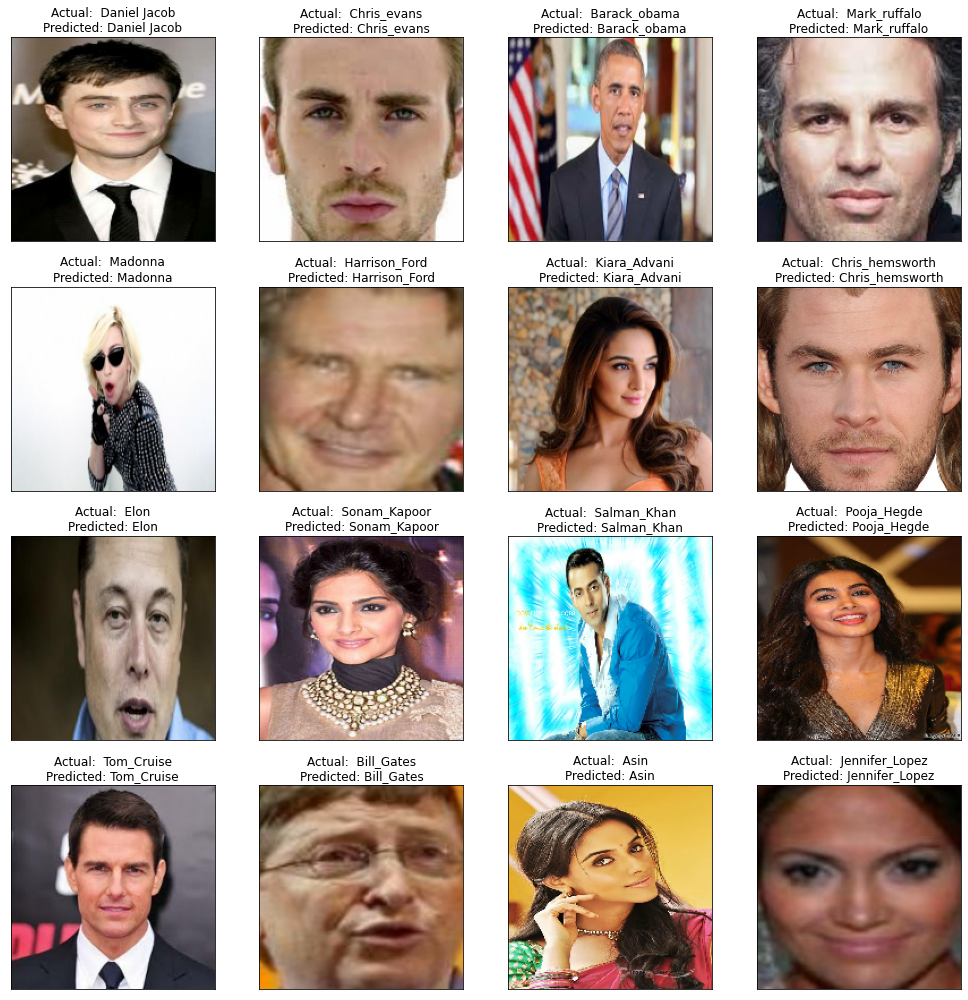

In [ ]:
#Visualising a batch of image dataset

test_batch = [(x, y) for (x,y) in test_ds.take(1)] # loading 1 batch of data
image, label = test_batch[0][0], test_batch[0][1]

prediction = saved_model.predict(image)
prediction = np.argmax(prediction, axis=1)


plt.figure(figsize=[14,14])
for e in range(16):
    plt.subplot(4,4,e+1)
    plt.imshow(image[e].numpy().astype('uint8'))
    actual_label = name_class_map[class_map[label[e].numpy()]]
    prediction = saved_model.predict(np.expand_dims(image[e], axis=0))
    predicted_label = name_class_map[class_map[np.argmax(prediction)]]
    #predicted_label = np.argmax(saved_model.predict(image))
    plt.title('Actual:  {}\nPredicted: {}'.format(actual_label, predicted_label))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()